In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from script import FrankeFunction
from sklearn.linear_model import Lasso

c:\Users\Bruker\miniconda3\envs\FYS-STK4155\lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Bruker\miniconda3\envs\FYS-STK4155\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Bruker\miniconda3\envs\FYS-STK4155\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+01, tolerance: 8.000e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

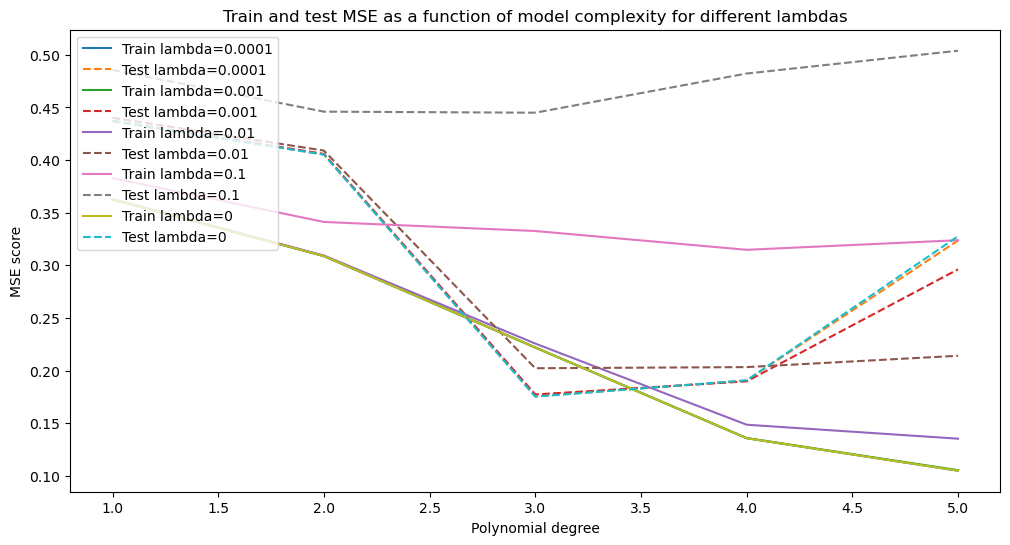

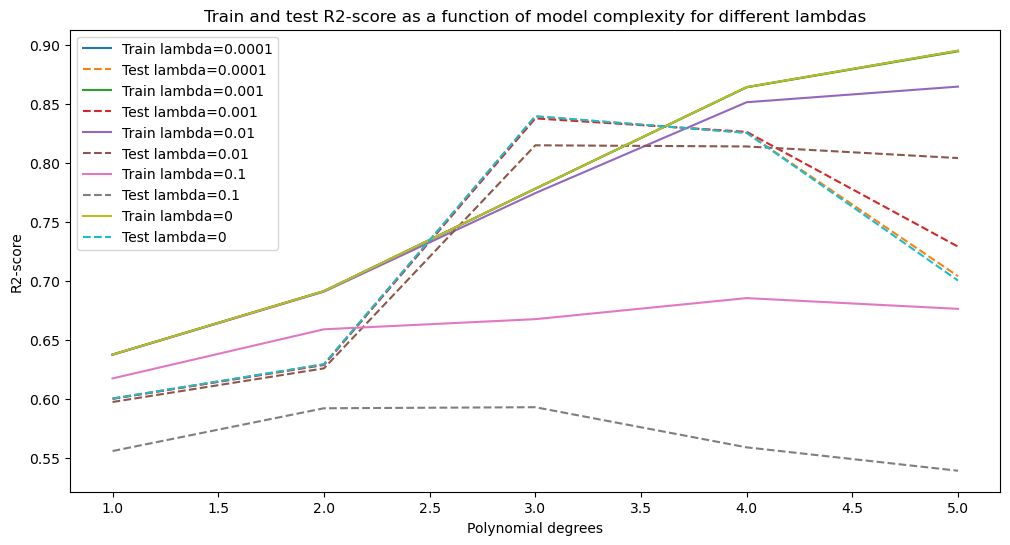

In [33]:
## WEEK 36 example WITH LASSO REGRESSION ##
# Franke function

# Generate data
np.random.seed(42)
n = 100
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

x_combined = np.hstack((x_scaled, y_scaled))


# Split the data into training and test data
x_train, x_test, z_train, z_test = train_test_split(x_combined, Z, test_size=0.2)

scaler_z = StandardScaler()
z_train = scaler_z.fit_transform(z_train.reshape(-1,1)).ravel()
z_test = scaler_z.transform(z_test.reshape(-1, 1)).ravel()  # Scaling z_test



lambda_values = [0.0001, 0.001, 0.01, 0.1, 0]
r2_values = {lmb: [] for lmb in lambda_values}
mse_values = {lmb: [] for lmb in lambda_values}
mse_values_test = {lmb: [] for lmb in lambda_values}
r2_values_test = {lmb: [] for lmb in lambda_values}
degrees = range(1, 6)

for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.transform(x_test)

  for lmb in lambda_values:
    lasso = Lasso(alpha=lmb, max_iter=10000)
    lasso.fit(x_train_poly, z_train)

    z_pred_train = lasso.predict(x_train_poly)
    z_pred_test = lasso.predict(x_test_poly)

    mse_train = mean_squared_error(z_train, z_pred_train)
    mse_test = mean_squared_error(z_test, z_pred_test)
    r2_train = r2_score(z_train, z_pred_train)
    r2_test = r2_score(z_test, z_pred_test)

    mse_values[lmb].append(mse_train)
    r2_values[lmb].append(r2_train)
    mse_values_test[lmb].append(mse_test)
    r2_values_test[lmb].append(r2_test)


plt.figure(figsize=(12,6))
for lmb in lambda_values:
  plt.plot(degrees, mse_values[lmb], linestyle='-', label=f"Train lambda={lmb}")
  plt.plot(degrees, mse_values_test[lmb], linestyle='--', label=f"Test lambda={lmb}")

plt.xlabel("Polynomial degree")
plt.ylabel("MSE score")
plt.title("Train and test MSE as a function of model complexity for different lambdas")
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
for lmb in lambda_values:
  plt.plot(degrees, r2_values[lmb], linestyle='-', label=f"Train lambda={lmb}")
  plt.plot(degrees, r2_values_test[lmb], linestyle='--', label=f"Test lambda={lmb}")

plt.xlabel("Polynomial degrees")
plt.ylabel("R2-score")
plt.title("Train and test R2-score as a function of model complexity for different lambdas")
plt.legend()
plt.show()
